In [1]:
%matplotlib inline
import pandas as pd
import sys
import matplotlib.pyplot as plt

from mxxl import mxxl

In [2]:
# Simulation path
mxxl_path = 'Data/Mxxl/'

# Read snapshots

In [3]:
# Read the file
snapshot = mxxl.read_snapshot(mxxl_path + 'Snapshot_063/snap_mxxl.10')

# Convert to pandas, which is handier to use
snapshot = pd.DataFrame(snapshot, columns=['pos_x', 'pos_y', 'pos_z'])

print(snapshot.shape)
snapshot.head()

snapshot

(97541972, 3)


pos_x       pos_y       pos_z
0         908.843750  703.590942  720.027771
1         908.838379  703.566223  720.025757
2         908.838745  703.564392  720.038879
3         908.836670  703.579285  720.021301
4         908.825500  703.579346  720.030273
...              ...         ...         ...
97541967  153.208496  103.698067  104.824524
97541968  153.525940  103.703529  105.342506
97541969  153.080353  102.972633  105.098671
97541970  152.652893  104.196075  103.319550
97541971  152.511780  105.170067  102.284149

[97541972 rows x 3 columns]

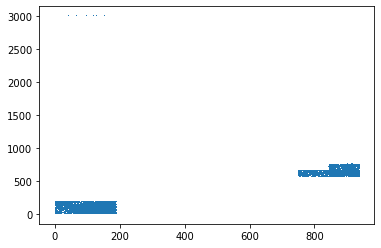

In [4]:
plt.close('all')

plt.plot('pos_x', 'pos_y', ',', data=snapshot.sample(10000))

# FoF haloes

In [5]:
file_path = mxxl_path + 'Fof/halo.0'

group_len, group_offset, group_com, group_pos, m_200, m_cri, m_vir = mxxl.read_fof_properties(file_path)

group_pos[:3]

array([[2038.4464 ,  581.6137 , 2328.4028 ],
       [1979.1573 ,  521.1411 , 2259.1145 ],
       [2023.3643 ,  577.74054, 2293.031  ]], dtype=float32)

In [3]:
file_path = mxxl_path + 'Fof/halo_part.0'

p_mass, time, box_size, pos_list = mxxl.read_fof_particles(file_path)

print(p_mass, time,box_size)

pos_list = pd.DataFrame(pos_list, columns=['pos_x', 'pos_y', 'pos_z'])

print(pos_list.shape)
pos_list.head()

0.6173581480979919 0.9999999999999997 3000.0
(9773929, 3)


pos_x       pos_y        pos_z
0  2038.444702  581.615967  2328.405029
1  2038.443115  581.621521  2328.397949
2  2038.436890  581.618958  2328.405762
3  2038.456421  581.612427  2328.394531
4  2038.442383  581.603577  2328.415039

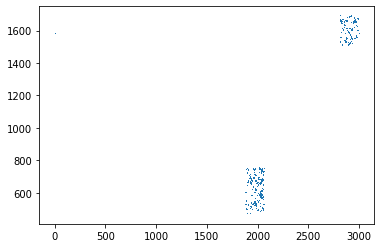

In [14]:
plt.close('all')

plt.plot('pos_x', 'pos_y', ',', data=pos_list.sample(10000))

# Read full catalogue

In [3]:
file_path = mxxl_path + 'Fof/vhalos_063_1e13.dat'

halo_cat = mxxl.read_full_catalogue(file_path)

halo_cat = pd.DataFrame(halo_cat, columns=['pos_x', 'pos_y', 'pos_z', 'm_cri', 'v_max'])

print(halo_cat.shape)
halo_cat.head()

(7490851, 5)


pos_x        pos_y        pos_z         m_cri        v_max
0  2038.446411   581.613708  2328.402832  96615.929688  1534.959839
1  1979.157349   521.141113  2259.114502  54600.390625  1284.152222
2  2023.364258   577.740540  2293.031006  93837.820312  1594.185547
3  1979.132324   527.956177  2285.942139  42819.343750  1292.880737
4  2922.420410  1548.702637  1695.184692  22519.990234  1014.030334

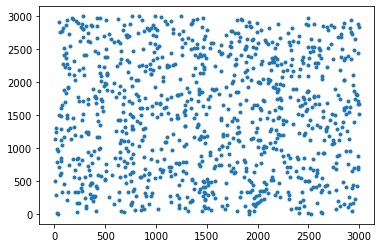

In [4]:
plt.close('all')

plt.plot('pos_x', 'pos_y', '.', data=halo_cat.sample(1000))

# Not sure what this was

I also had this function. I am not sure why it is reading the halo from the snapshot file and not from the halo_part file.

In [ ]:
def read_halo(gid):
    """
    Read particles of specific halo, identified by the _gid_
    :param gid:
    :return:
    """
    # Loop though all simulation files
    i = 0
    for k in range(3072):
        
        # Read the FoF group properties
        file_path = mxxl_path + 'Fof/halo.{}'.format(k)
        group_len, group_offset, _, group_pos, _, _, _ = mxxl.read_fof_properties(file_path)
        nhaloes = len(group_len)

        if (i + nhaloes > gid):
            poslist = mxxl.read_snapshot(mxxl_path + 'Snapshot_063/snap_mxxl.{}'.format(k))
            j = gid - i
            x = poslist[groupoffset[j]:groupoffset[j] + grouplen[j], ] - grouppos[j]

            # Wrap around the box sides
            mask = x > 1000
            x[mask] = x[mask] - 3000
            mask = x < -1000
            x[mask] = x[mask] + 3000

            return x, pmass

        i += nhaloes